In [47]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

#### Objective:
To analyze Diwali sales data in order to identify key customer segments, high-performing products, and regional trends that influence purchasing behavior. The goal is to uncover actionable insights that can help businesses optimize marketing strategies, product offerings, and inventory planning during festive seasons.



## 📦 Dataset Explanation

The Diwali sales dataset captures transaction-level data during the festive season, allowing analysis of customer behavior, regional trends, and product performance.

---

### 🔑 Key Columns in the Dataset

- **User_ID**: Unique identifier for each customer
- **Cust_name**: Name of the customer
- **Product_ID**: Unique identifier for the purchased product
- **Gender**: Gender of the customer (`Male` / `Female`)
- **Age Group**: Categorical age bucket (e.g., `0-17`, `18-25`, `26-35`, etc.)
- **Age**: Actual age of the customer
- **Marital_Status**: Marital status of the customer (`Married` / `Unmarried`)
- **State**: State from which the customer made the purchase
- **Zone**: Geographic zone (e.g., North, South, East, West)
- **Occupation**: Profession of the customer (e.g., IT, Healthcare, Aviation)
- **Product_Category**: Category to which the purchased product belongs
- **Orders**: Quantity of products purchased
- **Amount**: Total monetary value of the purchase (sales amount)

In [5]:
# import csv file
df = pd.read_csv(r"C:\Users\disha\Downloads\Diwali Sales Data.csv", encoding='latin1')

In [7]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [9]:
df.shape

(11251, 15)

In [11]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [15]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [17]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [19]:
# drop null values
df.dropna(inplace=True)

In [21]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [23]:
df['Amount'].dtypes

dtype('int32')

In [25]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [27]:
#rename column
df.rename(columns= {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [29]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [31]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

#### Gender

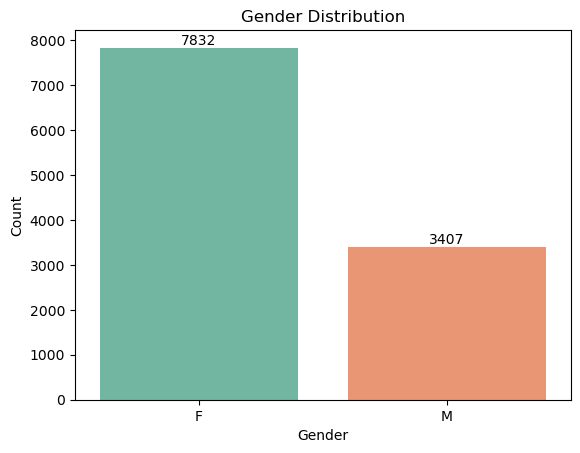

In [49]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x='Gender', data=df,  palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Gender Distribution')   # Optional: add a title
plt.xlabel('Gender')              # Optional: label x-axis
plt.ylabel('Count')               # Optional: label y-axis

plt.show()  # This is crucial to display the plot

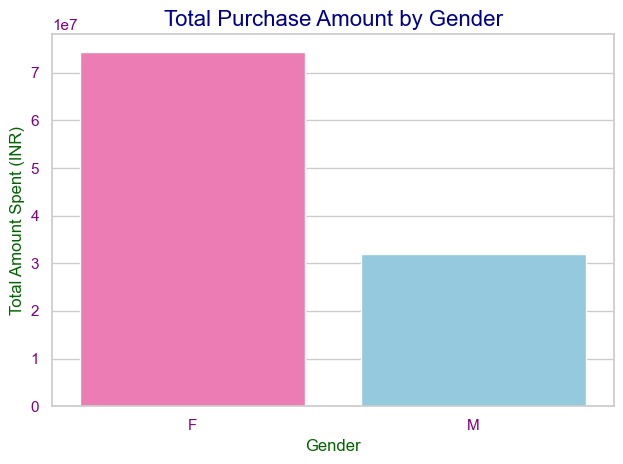

In [58]:
# Group data
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Set style
sns.set(style="whitegrid")

# Create barplot with custom colors
ax = sns.barplot(x='Gender', y='Amount', data=sales_gen, palette=['#FF69B4', '#87CEEB'])  # Pink & Sky Blue

# Add title and labels
plt.title('Total Purchase Amount by Gender', fontsize=16, color='darkblue')
plt.xlabel('Gender', fontsize=12, color='darkgreen')
plt.ylabel('Total Amount Spent (INR)', fontsize=12, color='darkgreen')

# Customize tick label colors
ax.tick_params(axis='x', colors='purple')
ax.tick_params(axis='y', colors='purple')

# Show plot
plt.tight_layout()
plt.show()

##### The sales data reveals a significant gender gap among customers:

Female customers: 7,832

Male customers: 3,407

This indicates that female customers account for over 69% of the total customer base, suggesting that the brand's offerings—likely including gifts, flowers, and occasion-based products—resonate more with women. Marketing strategies and product targeting could be optimized by focusing more on this dominant demographic while exploring opportunities to better engage male customers.

####  Age 

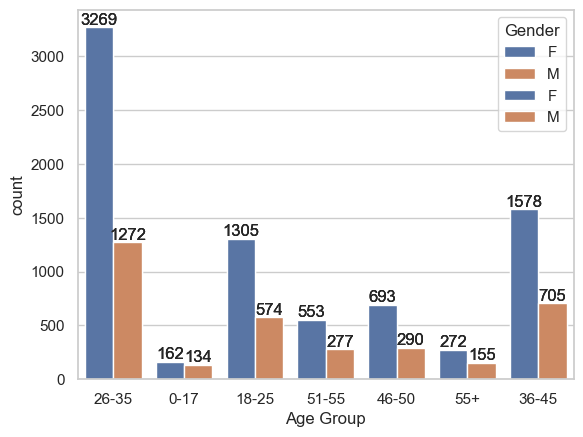

In [68]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

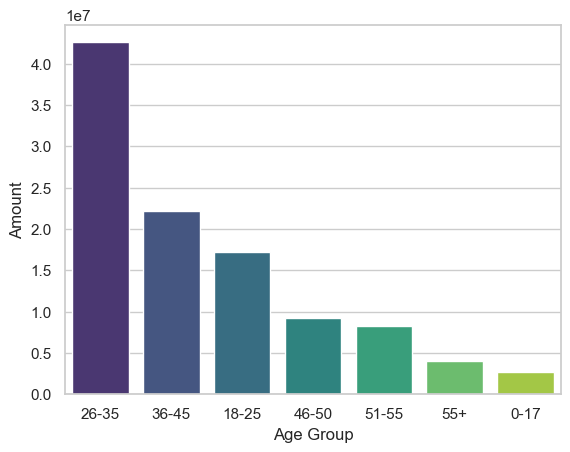

In [74]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Using a built-in seaborn palette for different colors
sns.barplot(x='Age Group', y='Amount', data=sales_age, palette='viridis')

plt.show()

Based on the barplot of total sales amount by age group, it is clear that the 26-35 age group is spending the most during Diwali sales. This indicates that people in this age range are the largest contributors to sales revenue in this period, suggesting they might have higher purchasing power or are more actively shopping during the festival. 

#### State

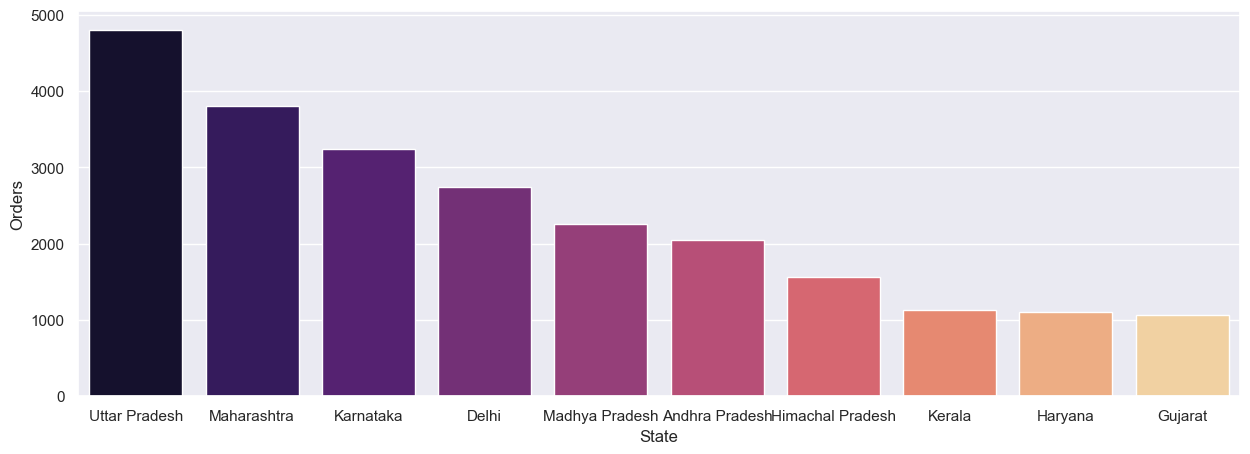

In [85]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders',palette='magma')
plt.show()

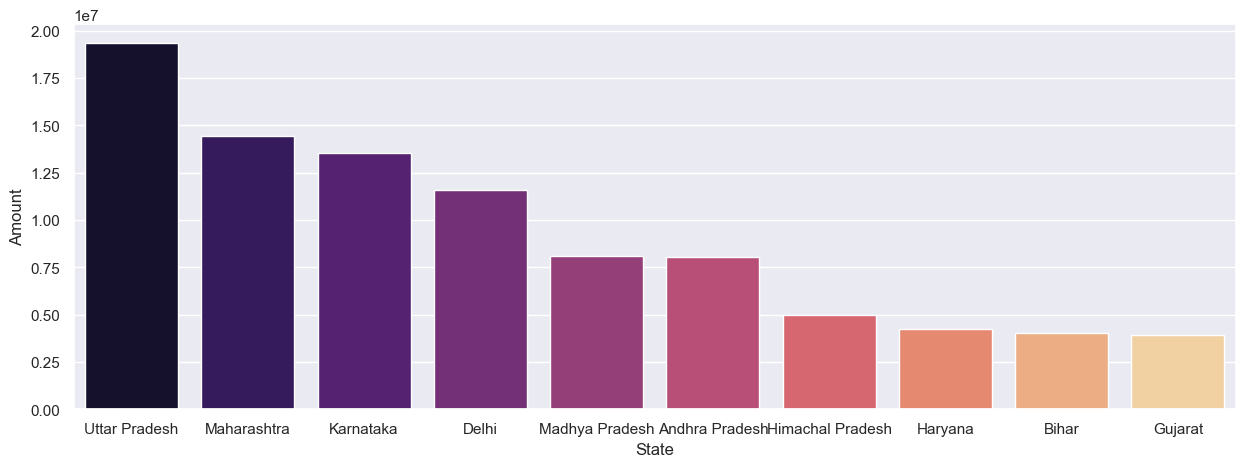

In [87]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount',palette='magma')
plt.show()

Based on the above graphs, it is evident that the highest number of orders come from Uttar Pradesh, while Maharashtra and Karnataka lead in terms of total sales amount. This suggests that Uttar Pradesh has the largest customer base placing orders, whereas Maharashtra and Karnataka generate the greatest revenue per order or overall sales. Businesses could focus their marketing and inventory strategies accordingly to maximize growth in these key states.Based on the above graphs, it is evident that the highest number of orders come from Uttar Pradesh, while Maharashtra and Karnataka lead in terms of total sales amount. This suggests that Uttar Pradesh has the largest customer base placing orders, whereas Maharashtra and Karnataka generate the greatest revenue per order or overall sales. Businesses could focus their marketing and inventory strategies accordingly to maximize growth in these key states.

#### Marital Status

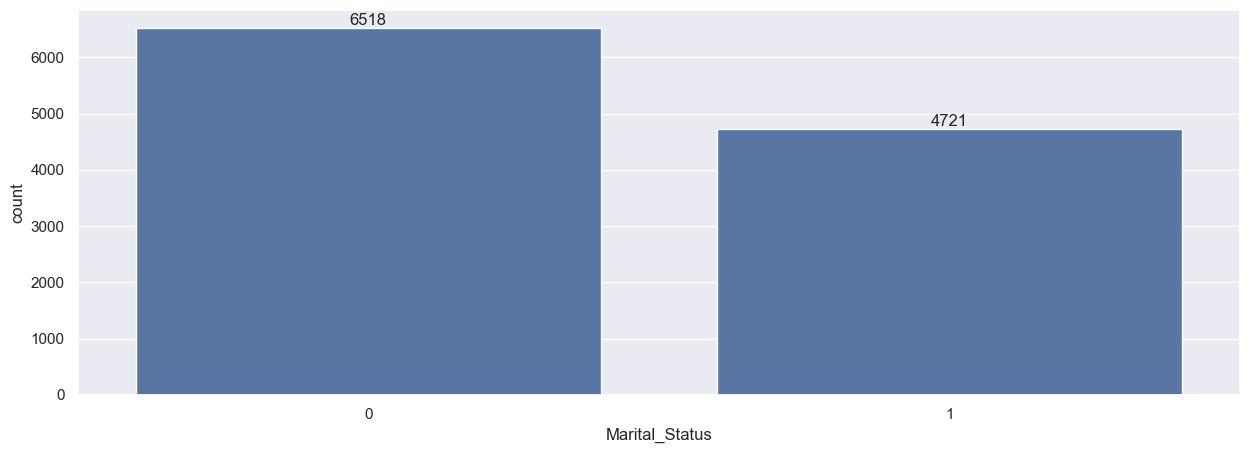

In [90]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

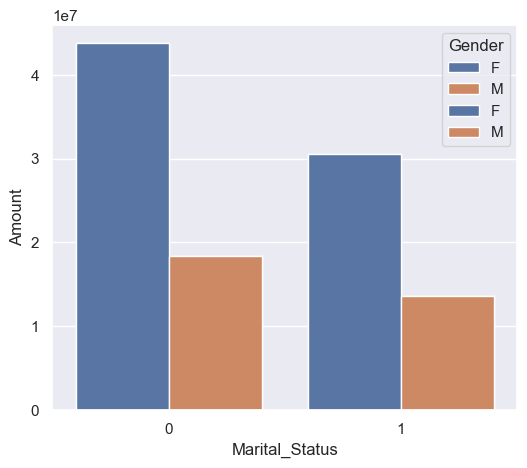

In [94]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')
plt.show()

From the above graphs, we can observe that the majority of buyers are married women, who also demonstrate high purchasing power. This indicates that married women form a significant customer segment with strong influence on sales, making them a valuable target audience for marketing and promotional efforts. Tailoring campaigns to this demographic could help further boost sales.

#### Occupation

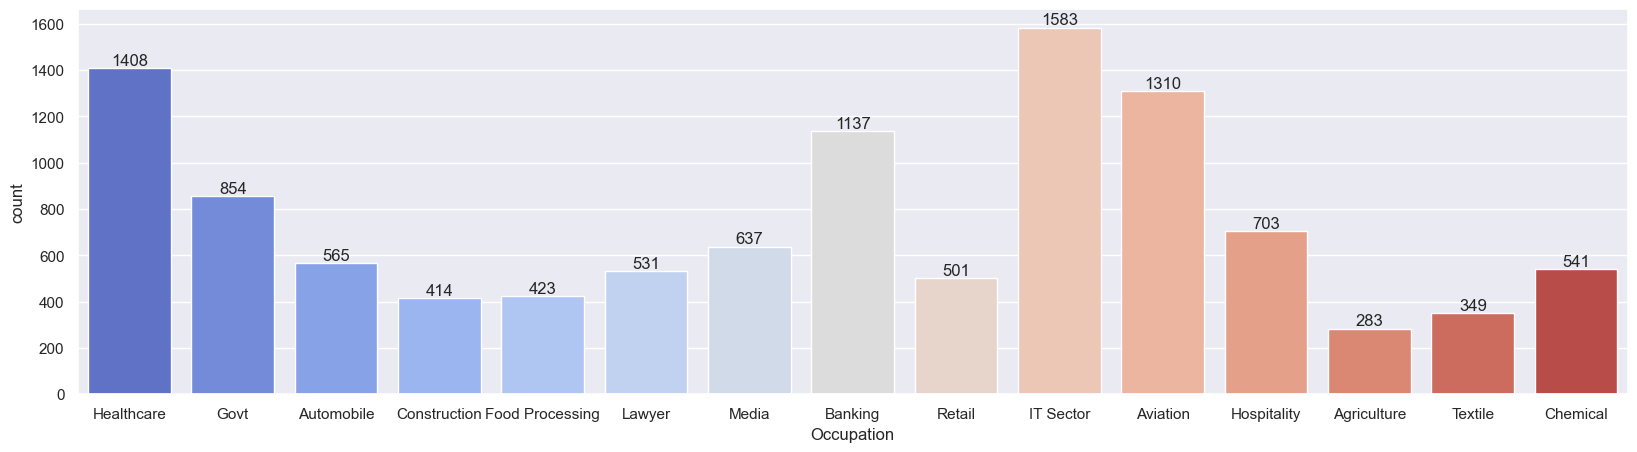

In [103]:
sns.set(rc={'figure.figsize': (20, 5)})
ax = sns.countplot(data=df, x='Occupation', palette='coolwarm')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

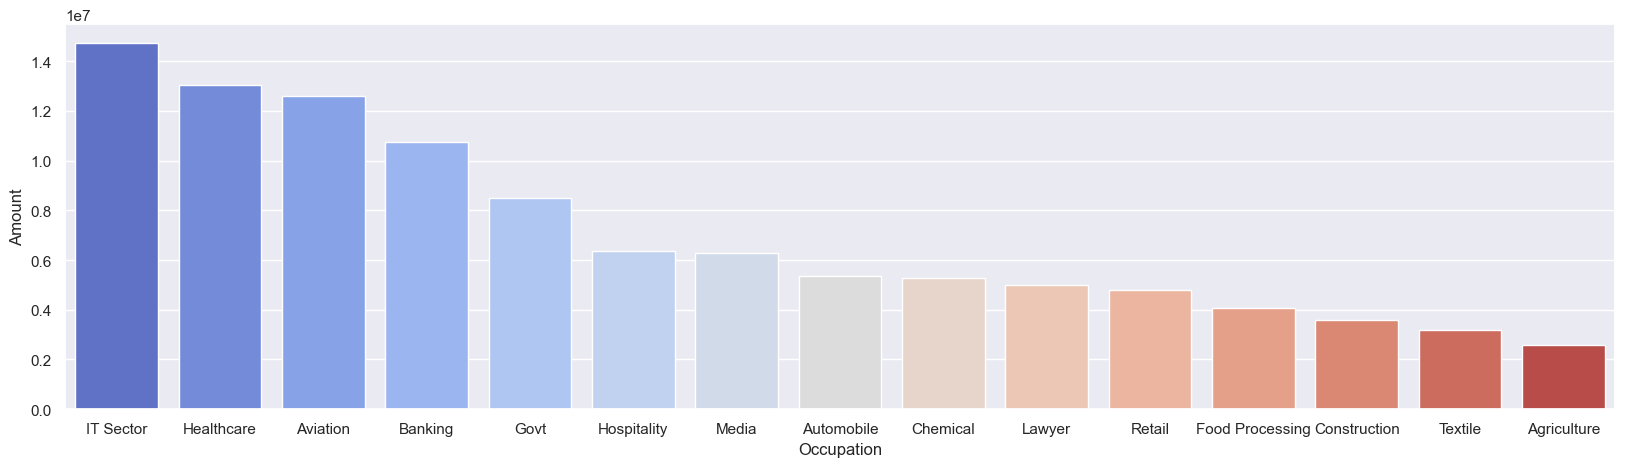

In [109]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',palette='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

From the above graph, it is clear that the majority of buyers work in the IT, Healthcare, and Aviation sectors. This indicates that these industries represent the largest customer segments in terms of occupation, which could be valuable for targeting tailored marketing strategies and product offerings to maximize engagement and sales within these groups.

#### Product Category

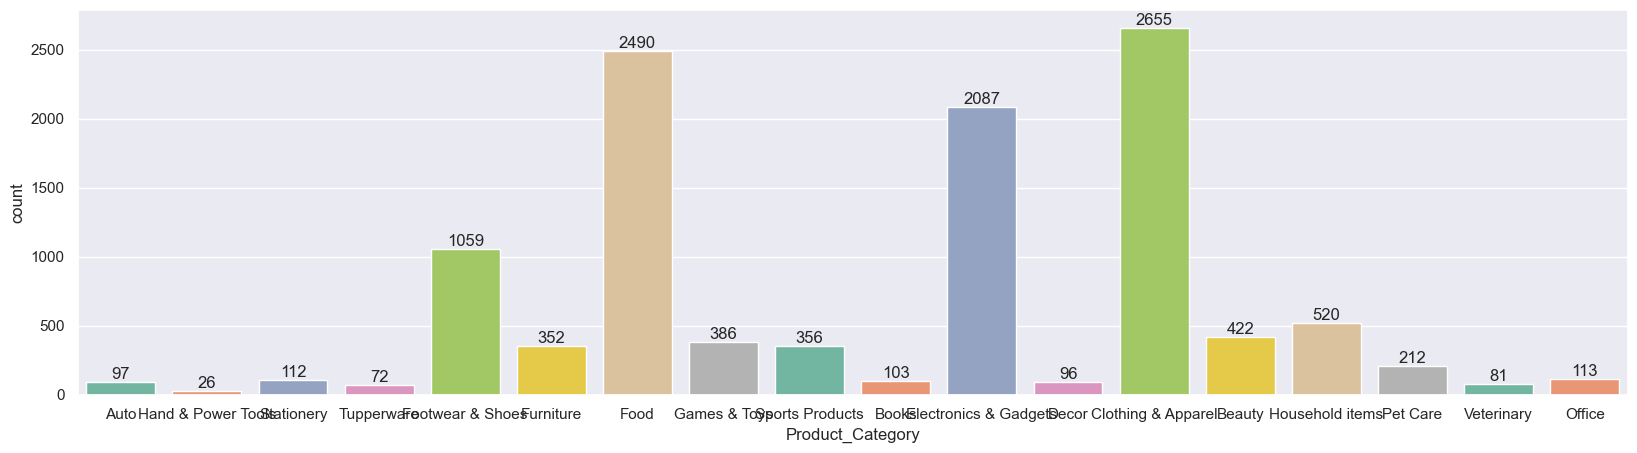

In [119]:
sns.set(rc={'figure.figsize': (20, 5)})
ax = sns.countplot(data=df, x='Product_Category', palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

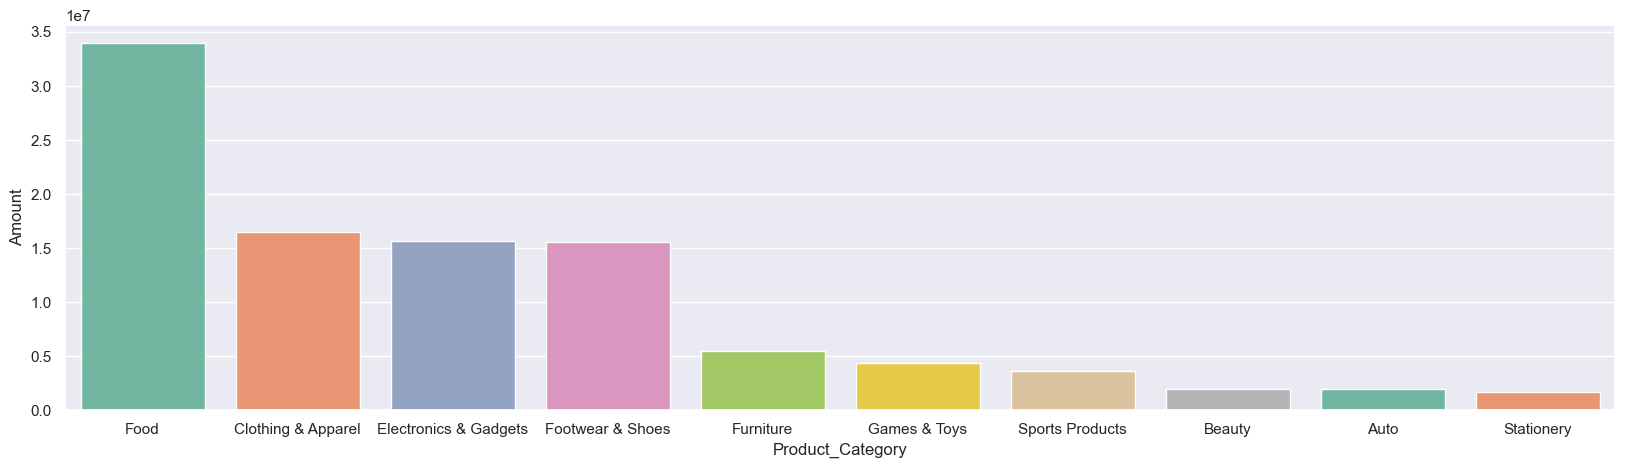

In [121]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',palette='Set2')
plt.show()

# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.show()


## Numerical Features Analysis

####  Age

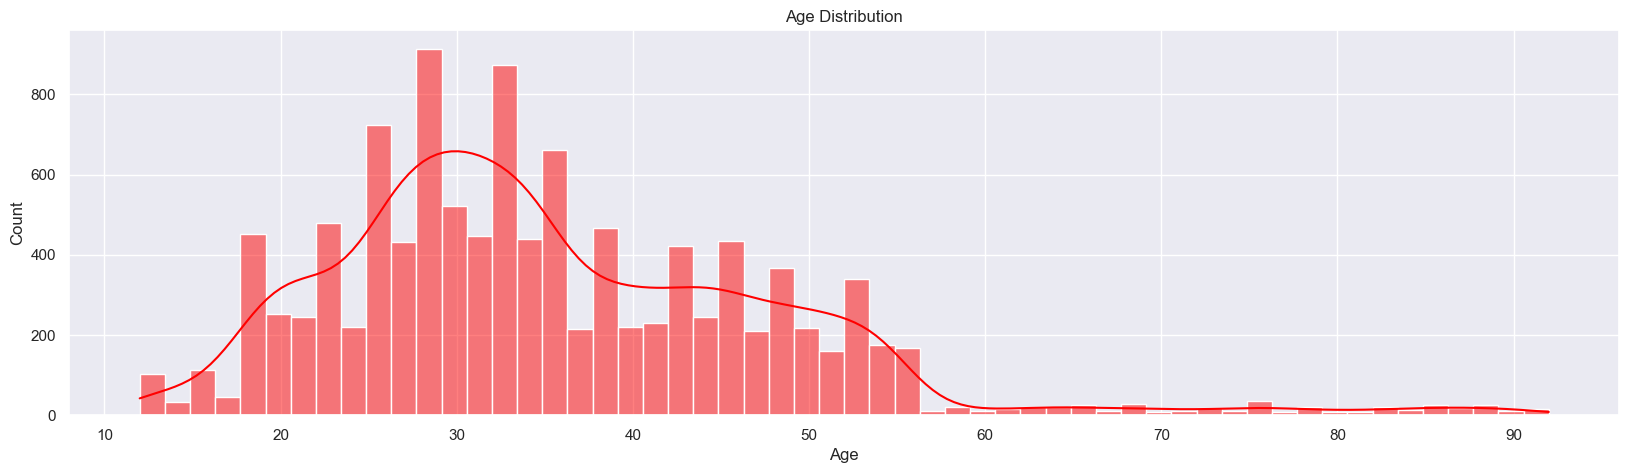

In [135]:
sns.histplot(df['Age'], kde=True, color='red')
plt.title('Age Distribution')
plt.show()

####  Orders

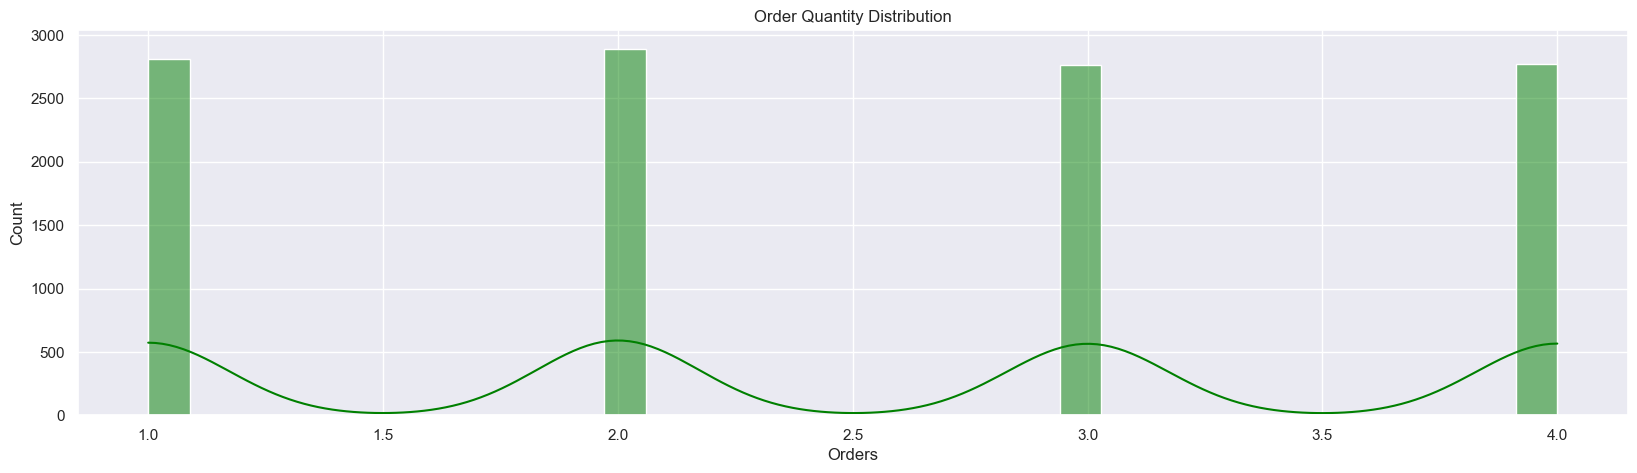

In [144]:
sns.histplot(df['Orders'], kde=True, color='green')
plt.title('Order Quantity Distribution')
plt.show()

####  Amount

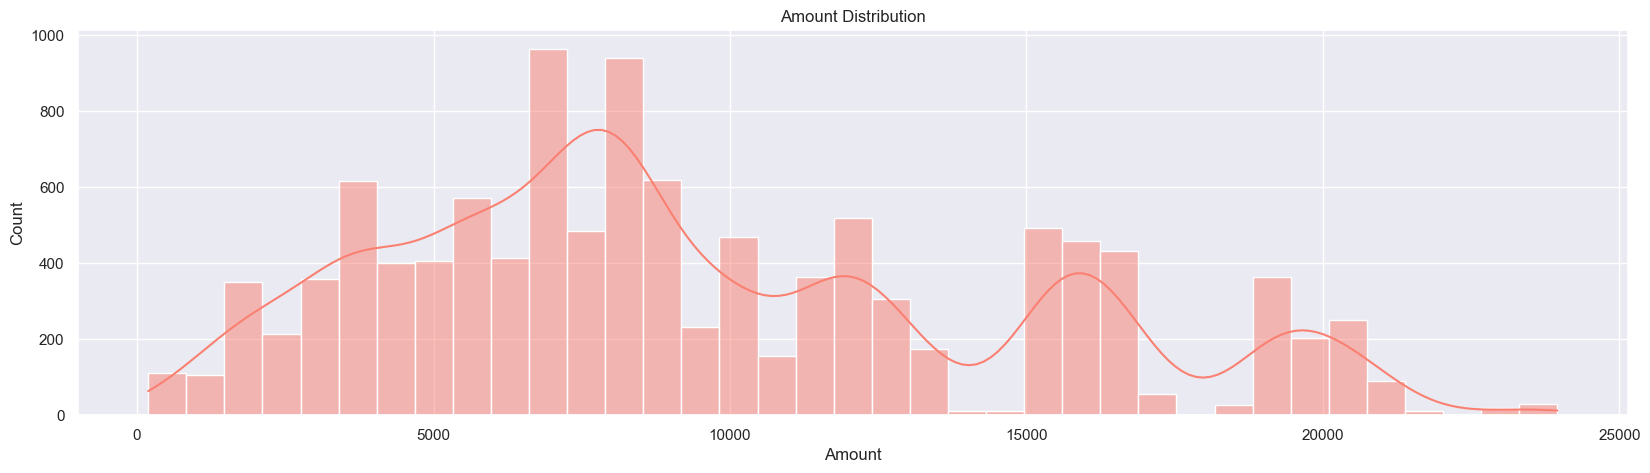

In [147]:
sns.histplot(df['Amount'], kde=True, color='salmon')
plt.title('Amount Distribution')
plt.show()

## Correlation Analysis

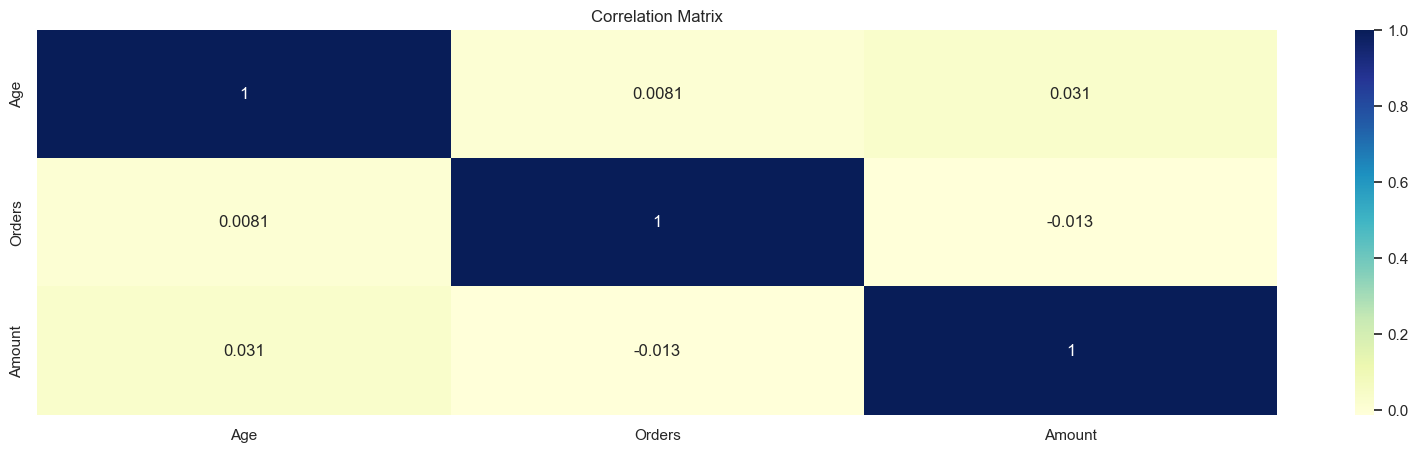

In [150]:
sns.heatmap(df[['Age', 'Orders', 'Amount']].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

## 📊 Business Insights

---

### 🔹 1. Core Customer Demographic  
- The **26–35 age group**, particularly **married women**, forms the largest and most valuable customer segment in terms of both **order volume** and **total spending**.  
- These customers have strong purchasing power and should be the **primary focus** for promotional campaigns and targeted marketing.

---

### 🔹 2. High-Value Locations  
- **Uttar Pradesh** records the highest number of orders.  
- **Maharashtra** and **Karnataka** contribute the most to overall **sales revenue**.  
- This suggests a need for **mass promotions** in high-engagement states and **premium targeting** in high-value regions.

---

### 🔹 3. Industry Influence  
- A significant share of buyers work in **IT**, **Healthcare**, and **Aviation** sectors.  
- Professionals in these industries are active during festive shopping and are ideal for **occupation-based segmentation** on platforms like LinkedIn or niche ad networks.

---

### 🔹 4. Product Performance  
- Certain **product categories - food ,clothings ** and specific **Product_IDs** are consistently more popular and generate higher revenue.  
- Focus on **stocking**, **bundling**, and **promoting** these products, especially during **festive seasons like Diwali**.

---

### 🔹 5. Regional and Zone-Level Trends  
- Different **zones** show varied demand patterns.  
- Use these trends to **optimize logistics**, **inventory placement**, and run **region-specific promotions**.

---

### 🔹 6. Seasonal Opportunities  
- The data reveals strong **festival-driven buying behavior**.  
- Orders and revenue spike during **Diwali**, emphasizing the value of **early and targeted seasonal campaigns** for high ROI.

---

### 🔹 7. Customer Loyalty Potential  
- Some customers appear repeatedly among top spenders.  
- There's potential to enhance **retention and lifetime value** via **loyalty programs**, **VIP tiers**, or **personalized marketing**.


📌 Final Recommendation
Focus on:

Segmented and targeted marketing based on age, marital status, occupation, and region.

Leveraging high-performing products and festive trends.

Building regional strategies for inventory and logistics.

Introducing loyalty and reward programs for top spenders.